#### JEWELRY PRICE OPTIMIZATION PROJECT
This Machine Learning project will be carried out using the CRISP-DM Methodolody

##### Data understanding and exploration

In [1]:
# import libraries to work with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set visualization theme
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
# load the dataset
df = pd.read_csv(r"C:\Users\User\Desktop\jp project\data\Jewelry_Dataset.csv")
df

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.000000e+00,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.000000e+00,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.000000e+00,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.000000e+00,102.27,1.515916e+18,NaN,red,gold,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95905,2021-12-01 09:47:37 UTC,2719016587653808559,1515966223597820877,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN
95906,2021-12-01 09:50:37 UTC,2719018098886705639,1956663830729720074,1,1.806829e+18,NaN,0.000000e+00,229.99,1.515916e+18,NaN,red,gold,NaN
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.000000e+00,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.000000e+00,83.42,1.515916e+18,NaN,white,gold,fianit


In [3]:
# Take a look at the first 5 rows
df.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


The dataset does not include column names and this will be fixed by using the column names provided in the data dictionary

In [4]:
# Include column names
df.columns = [
    "Order_Datetime",
    "Order ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem"]

In [5]:
# check if column names has been added
df.head(2)

,Order_Datetime,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [6]:
# look at the number of rows and columns
df.shape

(95910, 13)

In [7]:
# calculate the number of null values
df.isnull().sum()

Order_Datetime        0
Order ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Gender            48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

The dataset contains lots of missing values will be treated subsequently

In [8]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Gender          47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [9]:
# check for duplicates
df.duplicated().sum()

2589

The dataset contains 95,910 rows and 13 columns. It includes a mix of data types like objects, integers and floats. After taking a quick look, you can see that some columns have missing values and there are over 2,000 duplicate entries which are issues that have to be fixed going forward.

###### Data Cleaning

In [10]:
# convert the datetime column to date datatype
df['Order_Datetime'] =pd.to_datetime(df['Order_Datetime'], errors='coerce')

In [11]:
# confirm if conversion worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Order_Datetime  95910 non-null  datetime64[ns, UTC]
 1   Order ID        95910 non-null  int64              
 2   Product_ID      95910 non-null  int64              
 3   SKU_Quantity    95910 non-null  int64              
 4   Category_ID     90558 non-null  float64            
 5   Category        85977 non-null  object             
 6   Brand_ID        91125 non-null  float64            
 7   Price_USD       90558 non-null  float64            
 8   User_ID         90558 non-null  float64            
 9   Gender          47743 non-null  object             
 10  Main_Color      88250 non-null  object             
 11  Main_Metal      90448 non-null  object             
 12  Main_Gem        61852 non-null  object             
dtypes: datetime64[ns, UTC](1), floa

In [12]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Fill categorical missing values with 'Unknown'
df['Category'].fillna('Unknown', inplace=True)

df['Brand_ID'].fillna('Unknown', inplace=True)

df['Main_Metal'].fillna('Unknown', inplace=True)

df['Main_Color'].fillna('unknown-color', inplace=True) # merge the unknown values with the unknown-color entry

df['Gender'].fillna('Unknown', inplace=True)

df['Main_Gem'].fillna('Unknown', inplace=True)

In [14]:
# Drop missing values in target Price
df = df.dropna(subset=['Price_USD'])

In [15]:
# Convert Brand_ID float entries to single values
df['Brand_ID'] = df['Brand_ID'].apply(lambda x: str(int(x)) if isinstance(x, (float, int)) and not pd.isna(x) else str(x))

In [16]:
# get counts of unique observations for each category variable
distinct_values=  df.select_dtypes(['object']).columns
for i in range(len(distinct_values)):
    print(df[distinct_values[i]].value_counts())

jewelry.earring       29047
jewelry.ring          26025
jewelry.pendant       13083
Unknown                9837
jewelry.bracelet       6129
jewelry.necklace       2335
jewelry.brooch         1286
jewelry.souvenir        170
electronics.clocks      165
jewelry.stud             12
Name: Category, dtype: int64
0          42919
1          31471
2           8838
Unknown     4675
4             65
3             58
6             56
5              7
Name: Brand_ID, dtype: int64
f          46687
Unknown    41043
m            359
Name: Gender, dtype: int64
red              67909
white            14755
yellow            3322
unknown-color     2101
black                2
Name: Main_Color, dtype: int64
gold        86618
silver       1362
Unknown       107
platinum        2
Name: Main_Metal, dtype: int64
diamond                28950
Unknown                27203
fianit                 11935
topaz                   6260
pearl                   3593
garnet                  2680
sapphire                1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88089 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Order_Datetime  88089 non-null  datetime64[ns, UTC]
 1   Order ID        88089 non-null  int64              
 2   Product_ID      88089 non-null  int64              
 3   SKU_Quantity    88089 non-null  int64              
 4   Category_ID     88089 non-null  float64            
 5   Category        88089 non-null  object             
 6   Brand_ID        88089 non-null  object             
 7   Price_USD       88089 non-null  float64            
 8   User_ID         88089 non-null  float64            
 9   Gender          88089 non-null  object             
 10  Main_Color      88089 non-null  object             
 11  Main_Metal      88089 non-null  object             
 12  Main_Gem        88089 non-null  object             
dtypes: datetime64[ns, UTC](1), floa

In [18]:
# statistical analysis of the numerical variables
df.describe()

,Order ID,Product_ID,SKU_Quantity,Category_ID,Price_USD,User_ID
count,8.808900e+04,8.808900e+04,88089.0,8.808900e+04,88089.000000,8.808900e+04
mean,2.477630e+18,1.832195e+18,1.0,1.805950e+18,363.583797,1.512610e+18
std,1.931240e+17,2.071288e+17,0.0,2.080101e+16,448.344088,2.384248e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.990000,1.313554e+18
25%,2.373431e+18,1.806829e+18,1.0,1.806829e+18,143.700000,1.515916e+18
50%,2.516754e+18,1.956664e+18,1.0,1.806829e+18,259.970000,1.515916e+18
75%,2.637983e+18,1.956664e+18,1.0,1.806829e+18,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,34448.600000,1.554297e+18


In [19]:
# statistical analysis of the categorical variables
df.describe(include="object")

,Category,Brand_ID,Gender,Main_Color,Main_Metal,Main_Gem
count,88089,88089,88089,88089,88089,88089
unique,10,8,3,5,4,31
top,jewelry.earring,0,f,red,gold,diamond
freq,29047,42919,46687,67909,86618,28950


- From the statistical summary, Price_USD is the only numerical column that makes sense. It has an minimum value of 0.99 and maximum of 30000. It is positively skewed as the average value of 353 is higher than the median of 253.
- Category has jewelry.earring as the most bought product.
- Target_Gender is mostly made up of Females
- Red seems to be the most frequent main_color.
- Gold is the most frequent main_metal.
- Diamond occurs most for main_gem.
- 0 seems to be the most frequent Brand_ID.
- Features like Order_ID, Product_ID, Category_ID and User_ID don't seem to be useful in this dataset and will likely be removed.

##### EXPLORATORY DATA ANALYSIS

###### Univariate Distributions

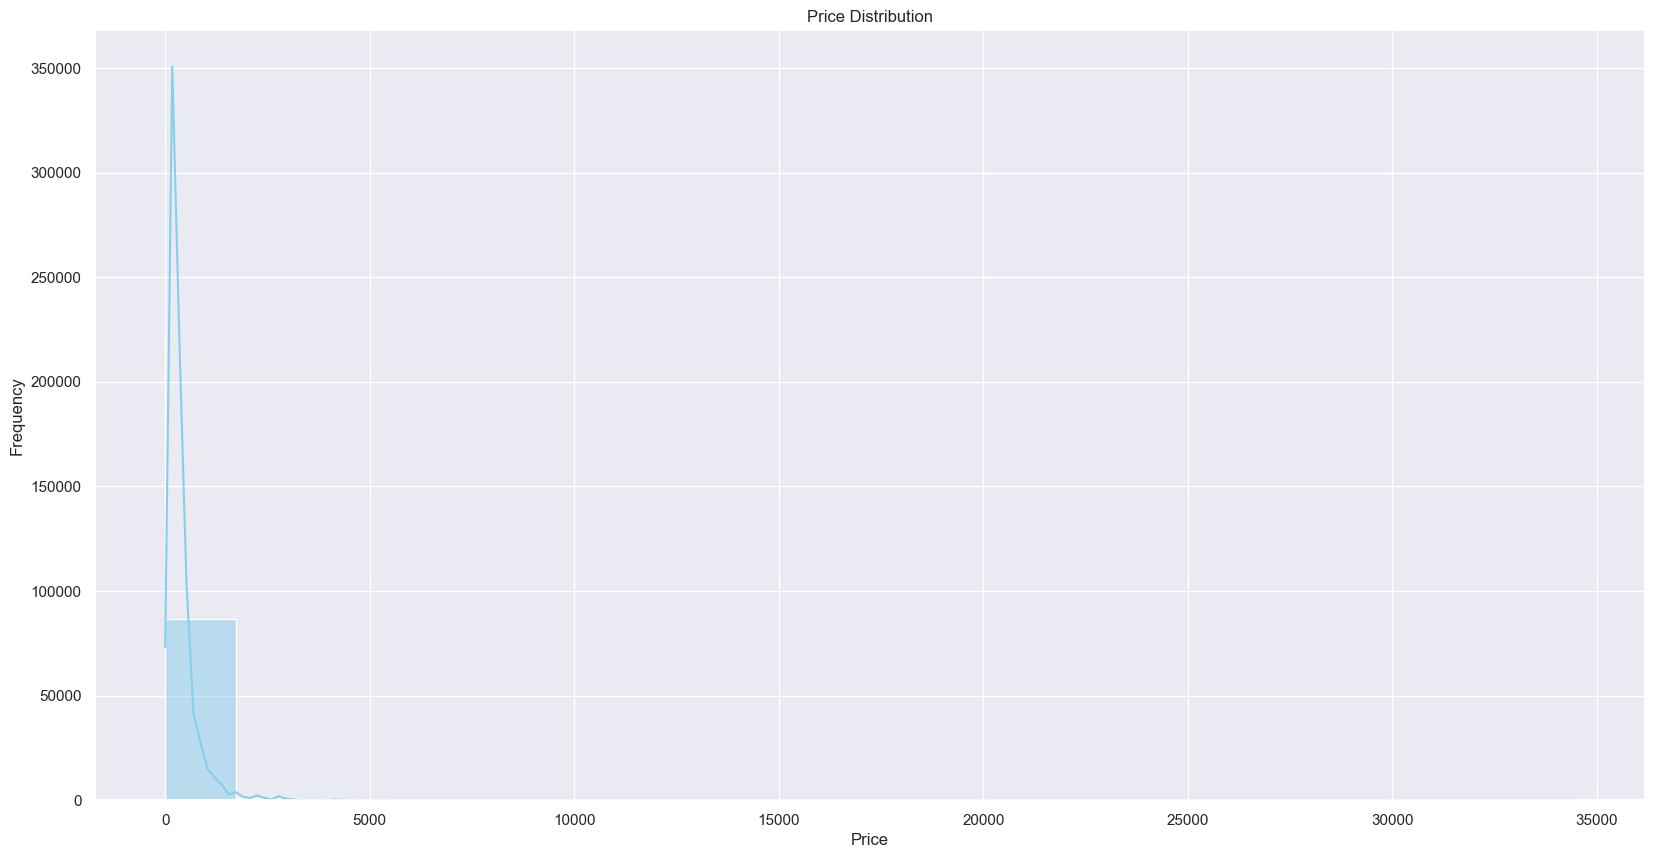

In [20]:
# Price Distribution
plt.figure(figsize=(20,10))

sns.histplot(data=df, x='Price_USD', bins=20, color='skyblue', kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This suggests that while most items are priced on the lower end, a few high-priced outliers are pulling the average upward. The histogram shows this positive skew, with most prices clustered low and a long tail toward higher values. From a business perspective, this indicates an opportunity to review the pricing strategy. The majority of products appear to be affordably priced, which may appeal to a broader market, but the presence of high-priced items suggests a potential premium segment. It may be worth analyzing whether these high-priced items are generating enough value or if pricing can be optimized to improve sales across different customer segments.

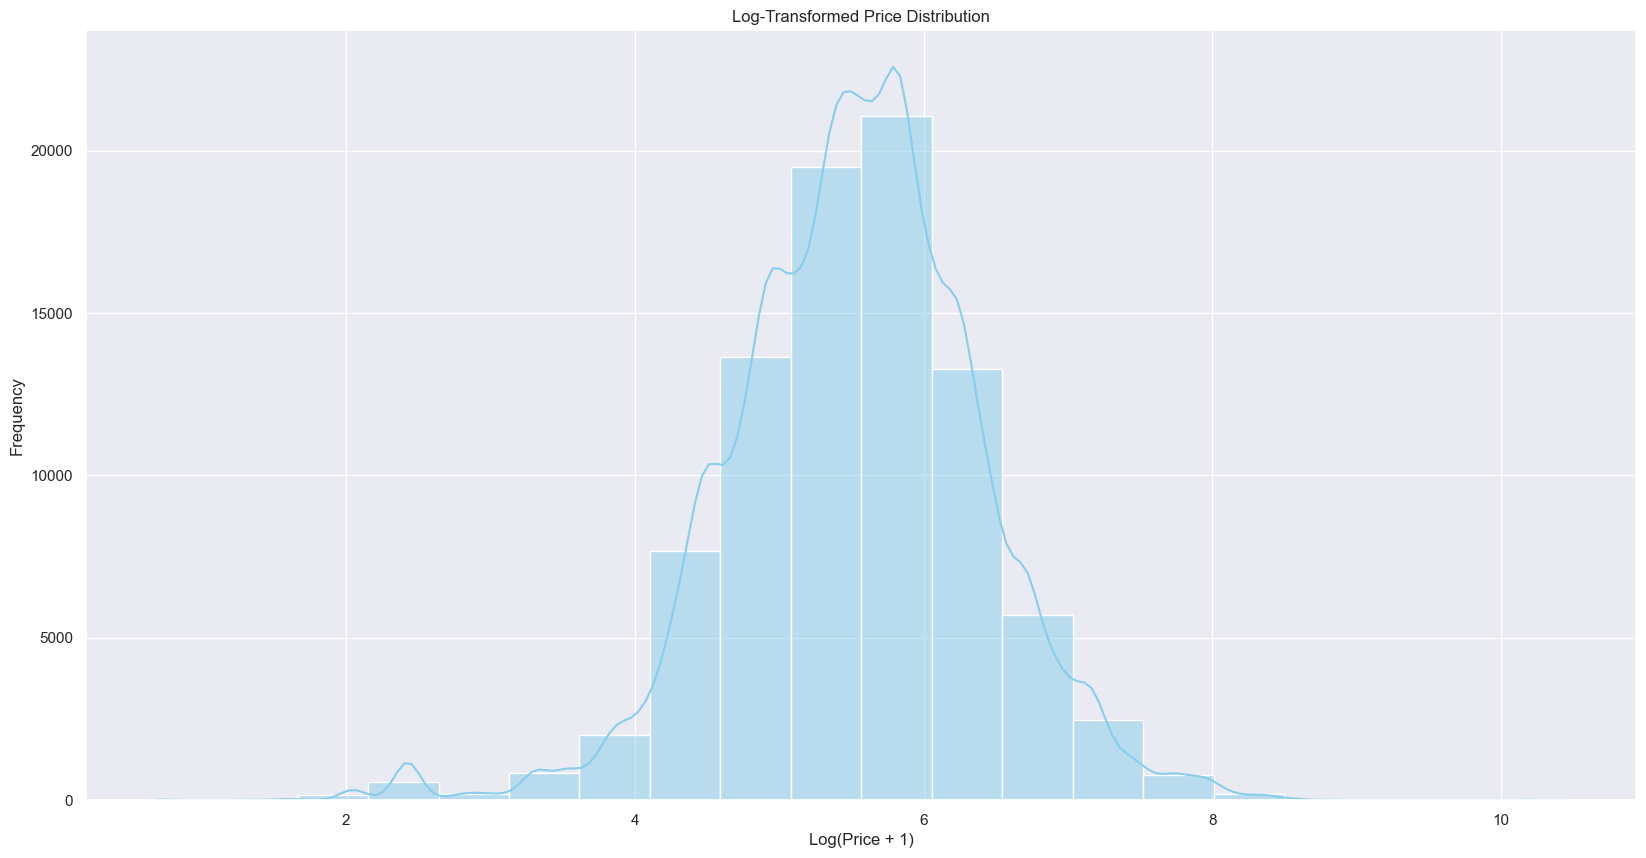

In [21]:
# Log-transform and plot
plt.figure(figsize=(20, 10))

sns.histplot(np.log1p(df['Price_USD']), bins=20, color='skyblue', kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

The log-transformed price distribution shows a clear improvement in symmetry, turning the originally skewed data into a more bell-shaped, normal-like curve. Most prices now cluster around the 250–400 range, with fewer extreme outliers influencing the shape. This transformation effectively reduces the impact of high-price outliers, making the data more suitable for regression models that assume normality.

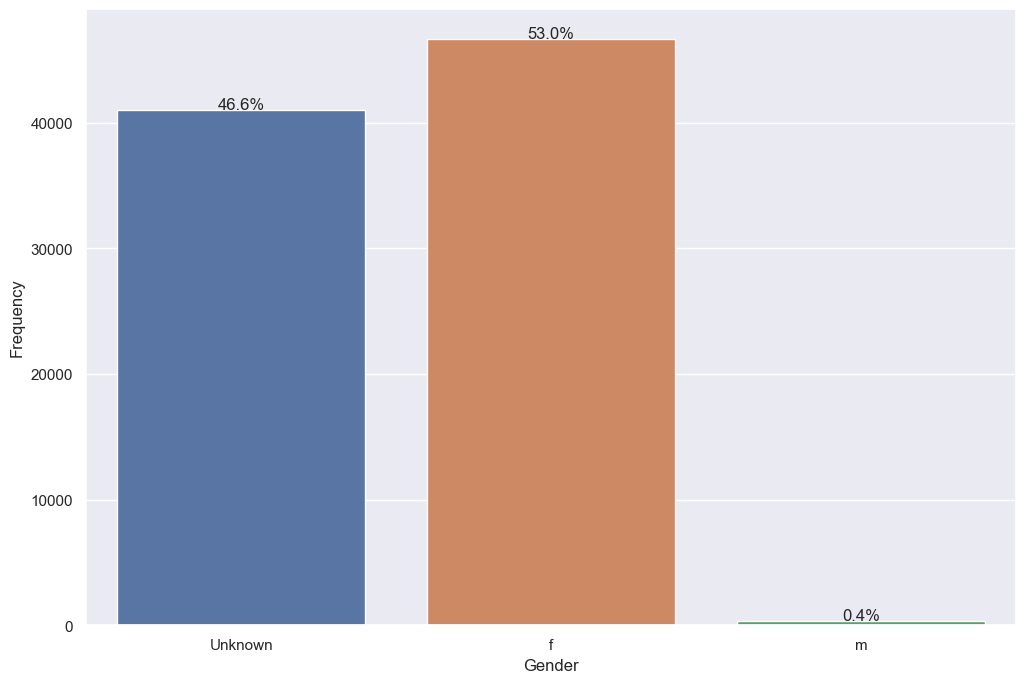

In [22]:
## Gender Analysis
plt.figure(figsize = (12, 8))

# Create the countplot
ax = sns.countplot(data=df, x="Gender")

# Calculate percentages
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percent = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 5, percent, ha='center', fontsize=12)

# create labels

plt.xlabel("Gender")
plt.ylabel("Frequency")

plt.show()

The Gender distribution shows a significant difference, with females making up 55.7%, unknown values with 44.0% and males at 0.3% of the population. This indicates that most purchases are made by female customers. In conclusion, Gemineye may benefit from developing marketing strategies or product lines that better engage male customers, helping to tap into a currently underrepresented segment. Gemineye should also concentrate on collecting correct and appropriate data as the unknown gender entries are too frequent.

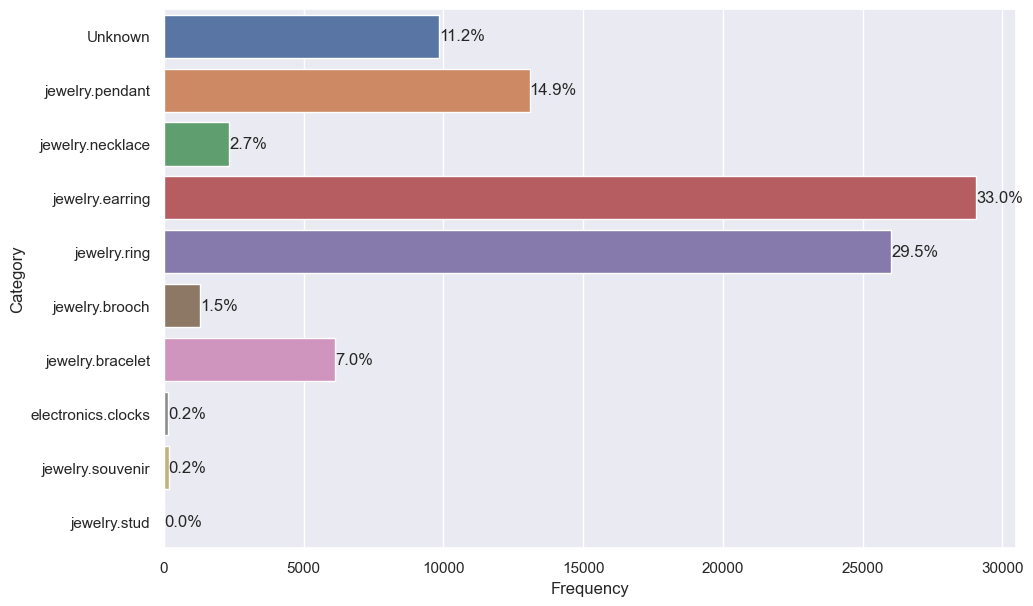

In [23]:
# Jewelry Category Analysis
plt.figure(figsize = (11, 7))

# Create the countplot
ax = sns.countplot(data=df, y="Category")

# Calculate percentages
total = len(df)
for p in ax.patches:
    count = p.get_width()
    percent = f'{100 * count / total:.1f}%'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(x + 5, y, percent, va='center', fontsize=12)

# Create labels
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

The jewelry category distribution reveals that earrings (33%) and rings (29.5%) are the dominant product types, together accounting for over 60% of total sales. Pendants also contribute a moderate share at 14.9%, while categories like bracelets (7.0%), necklaces (2.7%), and brooches (1.5%) have relatively lower representation. Souvenirs (0.2%) and studs (0%) show minimal or no sales activity.

This distribution suggests that Gemineye’s core demand lies in earrings and rings. To drive growth, the company could focus on expanding these popular categories while also exploring strategies to boost visibility and appeal for underperforming segments like bracelets, necklaces, and brooches.

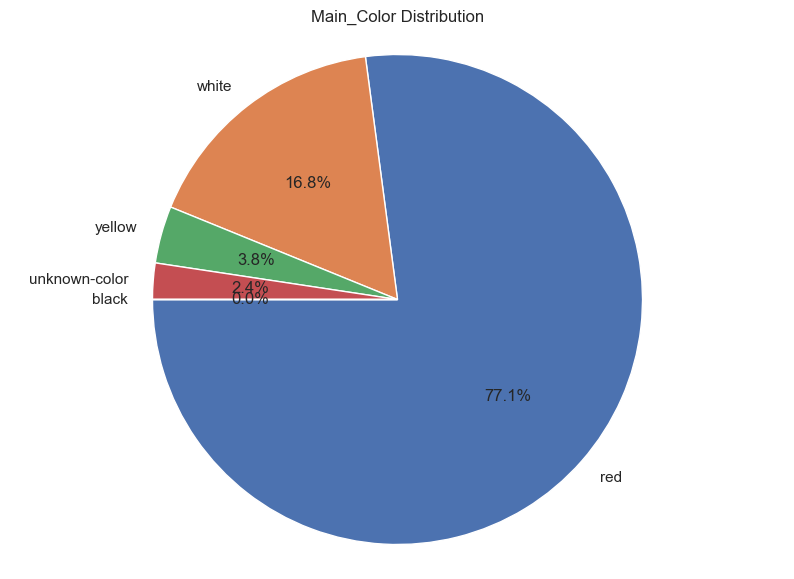

In [24]:
# Main_Color Analysis
# Count the values and calculate percentages
color_counts = df['Main_Color'].value_counts()
color_percent = color_counts / color_counts.sum() * 100

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(color_percent, labels=color_percent.index, autopct='%1.1f%%', startangle=180)
plt.title('Main_Color Distribution')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

The main color distribution shows that most products are red, making it the clear favorite in the lineup. White comes in a distant second and yellow appears only rarely. There are a few entries with unknown colors, which might just be data entry issues. Overall, it’s clear that red is the dominant color in the collection.

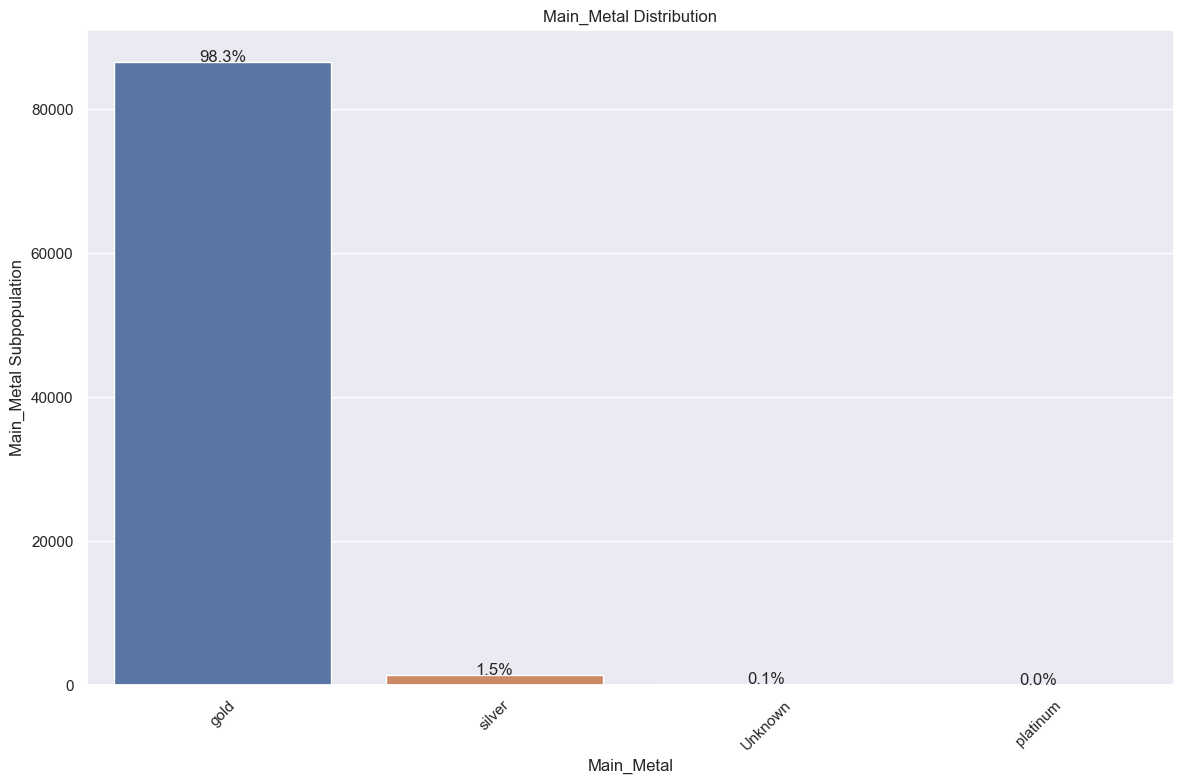

In [25]:
## Main_Metal Analysis
plt.figure(figsize=(12, 8))

# Create the countplot
ax = sns.countplot(data=df, x="Main_Metal")

# Calculate percentages
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percent = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 5, percent, ha='center', fontsize=12)

# Create labels
plt.xlabel("Main_Metal")
plt.ylabel("Main_Metal Subpopulation")
plt.title("Main_Metal Distribution")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The chart shows that gold overwhelmingly dominates as the main metal used in the products, with silver making up a very small portion. Platinum is virtually absent. This suggests a strong focus on gold-based jewelry, which could reflect customer preference, brand identity, or pricing strategy.

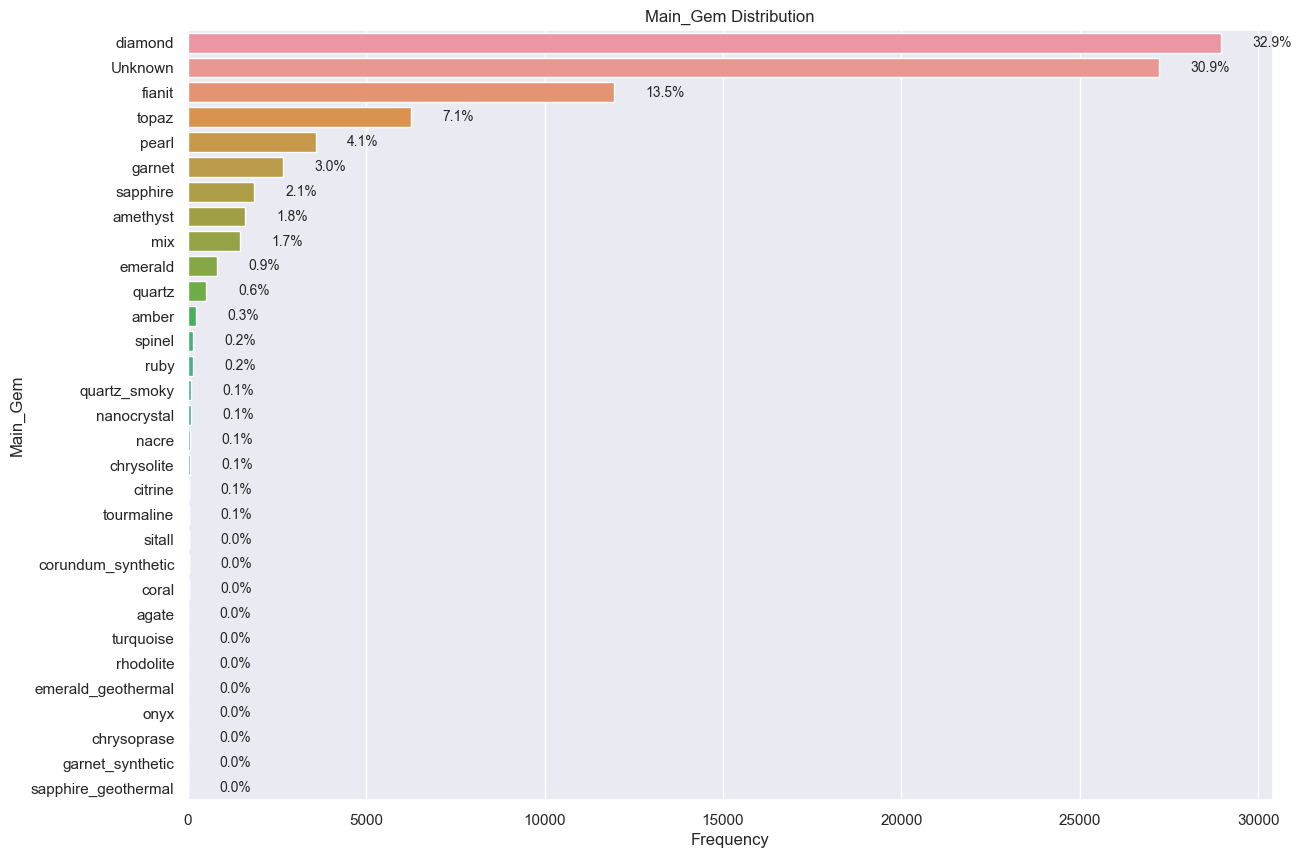

In [26]:
# Main_gem Analysis
plt.figure(figsize=(14, 10))  # Bigger figure for more categories

# Horizontal countplot
ax = sns.countplot(data=df, y="Main_Gem", order=df['Main_Gem'].value_counts().index)

total = len(df)
for p in ax.patches:
    count = p.get_width()
    percent = f'{100 * count / total:.1f}%'
    x = p.get_width() + total * 0.01  
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, percent, va='center', fontsize=10)

plt.ylabel("Main_Gem")
plt.xlabel("Frequency")
plt.title("Main_Gem Distribution")

plt.show()

The main gem distribution shows that diamonds are by far the most common gemstone used, followed by the unknown gems, fianit and topaz. Pearls, garnets, sapphires and amethysts also appear but in much smaller amounts. Other gemstones are rarely used, suggesting the product line is heavily centered around a few popular stones, particularly diamonds.

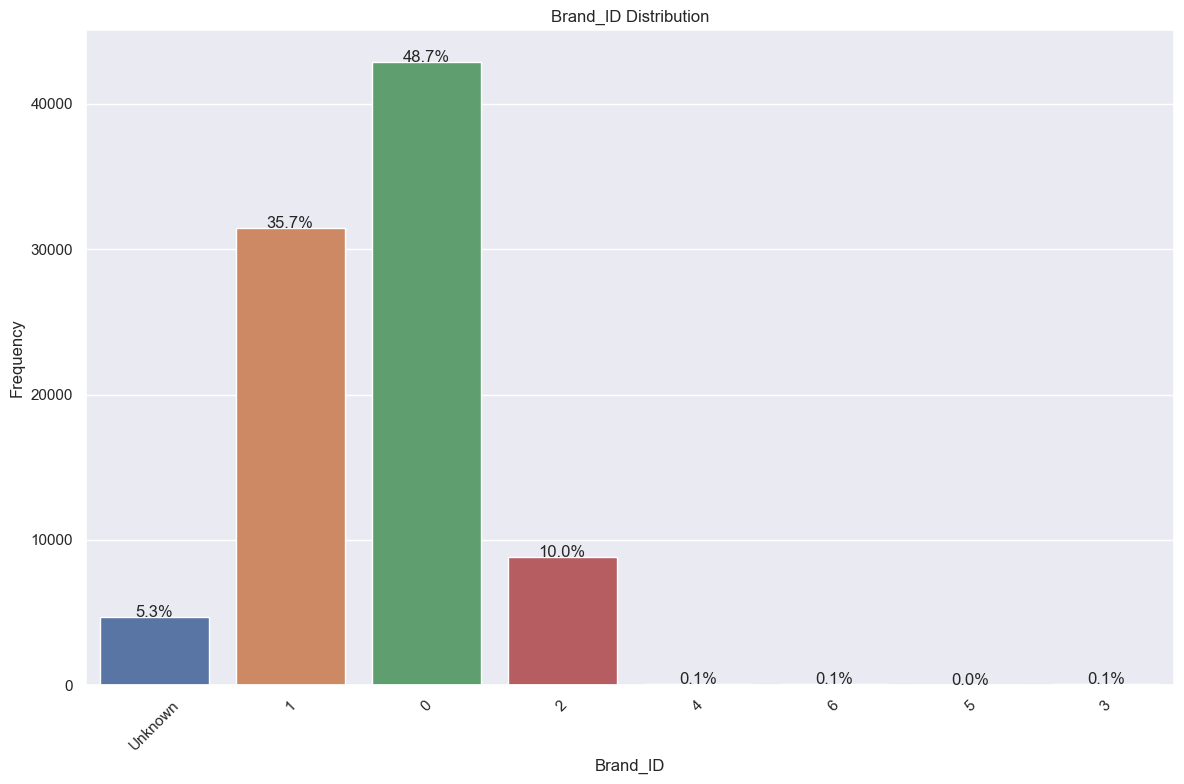

In [27]:
## Brand_ID Analysis
plt.figure(figsize=(12, 8))

# Create the countplot
ax = sns.countplot(data=df, x="Brand_ID")

# Calculate percentages
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percent = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 5, percent, ha='center', fontsize=12)

# Create labels
plt.xlabel("Brand_ID")
plt.ylabel("Frequency")
plt.title("Brand_ID Distribution")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

###### Bivariate Analysis

In [28]:
# Sales trend over time
# First extract year and month into new columns
df['Order_year'] = df['Order_Datetime'].dt.year
df['Order_month'] = df['Order_Datetime'].dt.month_name()

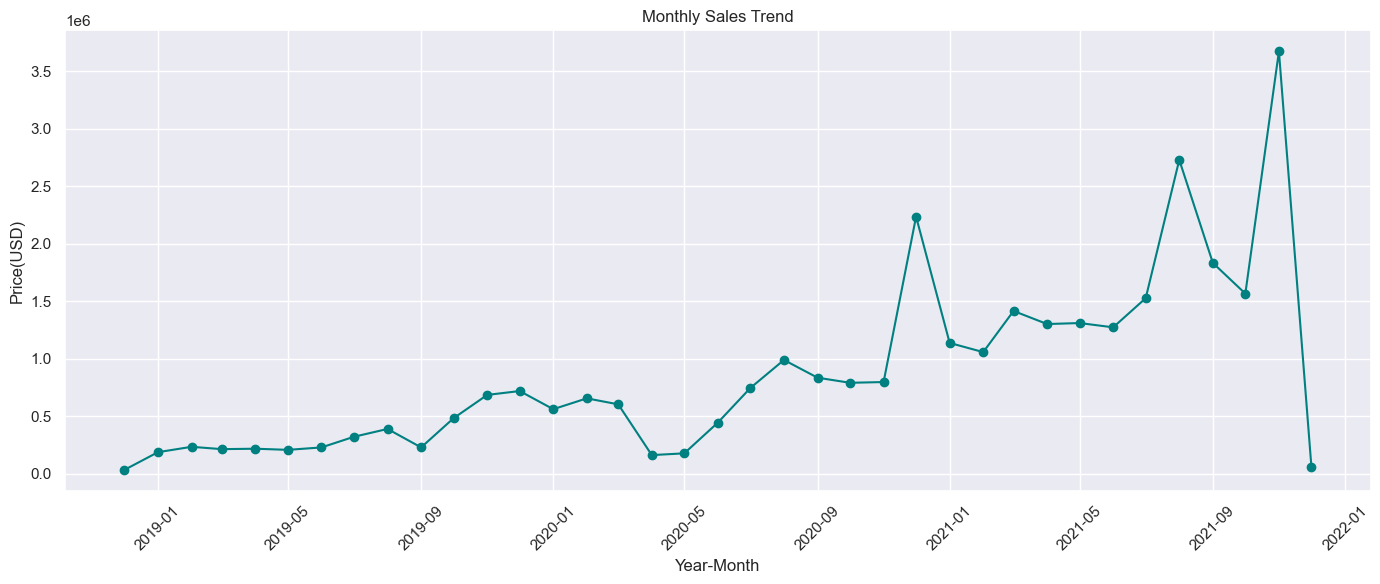

In [29]:
# Create a 'year-month' datetime column for proper sorting
df['year_month'] = pd.to_datetime(df['Order_year'].astype(str) + '-' + df['Order_month'].astype(str) + '-01')

# Group by the new year-month column and sum the prices
monthly_sales = df.groupby('year_month')['Price_USD'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['Price_USD'], marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Price(USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The sales trend shows steady growth from 2019 through 2020, with a sharp rise in 2021 marked by several spikes. This suggests increasing demand or successful campaigns during that year. However, sales drop off sharply at the end, possibly due to seasonality or missing data for 2022.

In [30]:
# lets calculate the total sales price in  each years 2019,2020,2021, 2022
total_sales_2019 = df[df['Order_year'] == 2019]['Price_USD'].sum()
total_sales_2020 = df[df['Order_year'] == 2020]['Price_USD'].sum()
total_sales_2021 = df[df['Order_year'] == 2021]['Price_USD'].sum()
total_sales_2022 = df[df['Order_year'] == 2022]['Price_USD'].sum()
total_sales = df['Price_USD'].sum()


print(f"Total sales in 2019: ${total_sales_2019:,.2f}")
print(f"Total sales in 2020: ${total_sales_2020:,.2f}")
print(f"Total sales in 2021: ${total_sales_2021:,.2f}")
print(f"Total sales in 2022: ${total_sales_2022:,.2f}")
print(f"Total sales: ${total_sales:,.2f}")

Total sales in 2019: $4,111,085.13
Total sales in 2020: $8,996,148.99
Total sales in 2021: $18,887,916.88
Total sales in 2022: $0.00
Total sales: $32,027,733.06


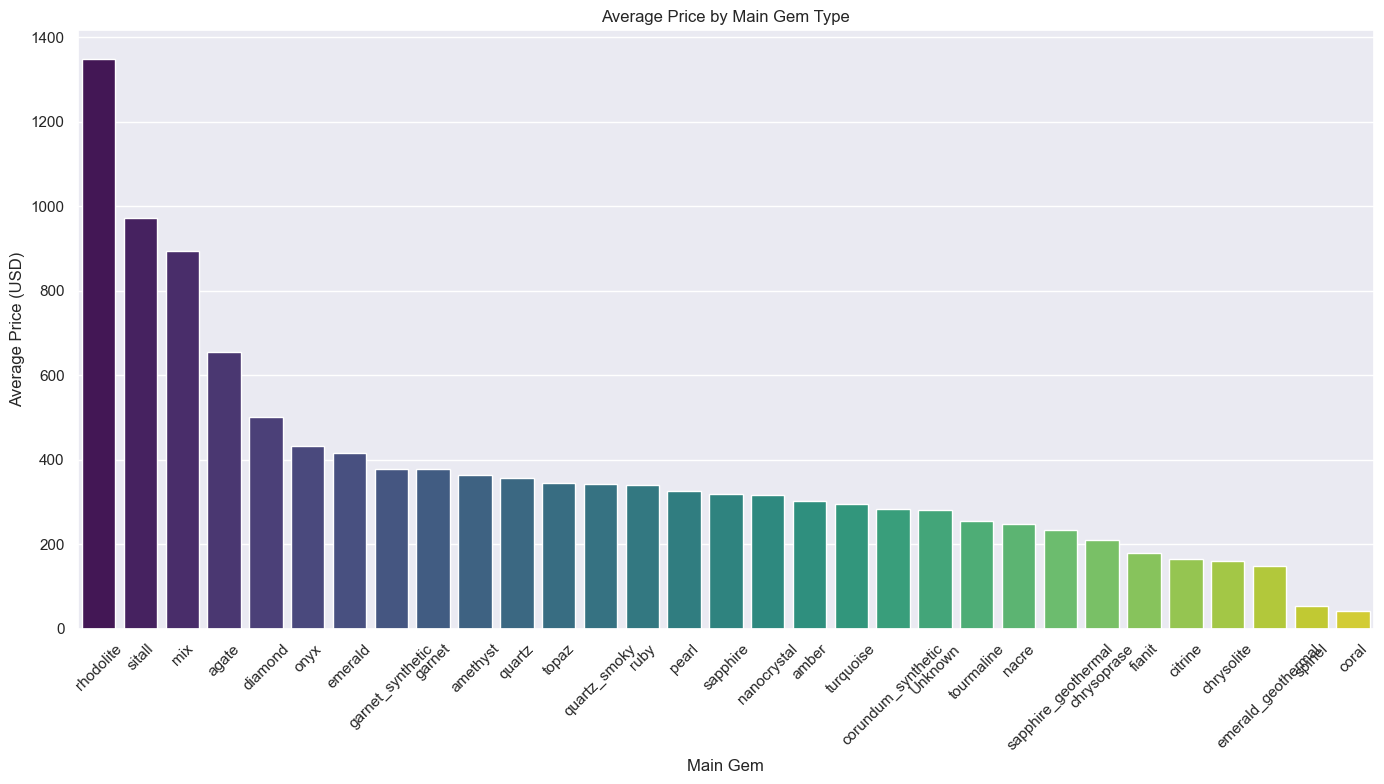

In [31]:
# Price_USD by Main_Gem
# Group by Main_Gem and calculate average price
avg_price_per_gem = df.groupby('Main_Gem')['Price_USD'].mean().reset_index()

# Sort by price 
avg_price_per_gem = avg_price_per_gem.sort_values(by='Price_USD', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_per_gem, x='Main_Gem', y='Price_USD', palette='viridis')

plt.title('Average Price by Main Gem Type')
plt.xlabel('Main Gem')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart shows that rhodolite and sitall have the highest average prices among all gem types, indicating they may be more premium or rare in this dataset. On the other end, coral, shell and emerald are associated with the lowest average prices. Notably, popular gems like diamond, emerald and sapphire fall in the mid-to-upper price range, suggesting a balance between demand and availability. This kind of pricing insight can help in optimizing product positioning and marketing strategy for different gem types.

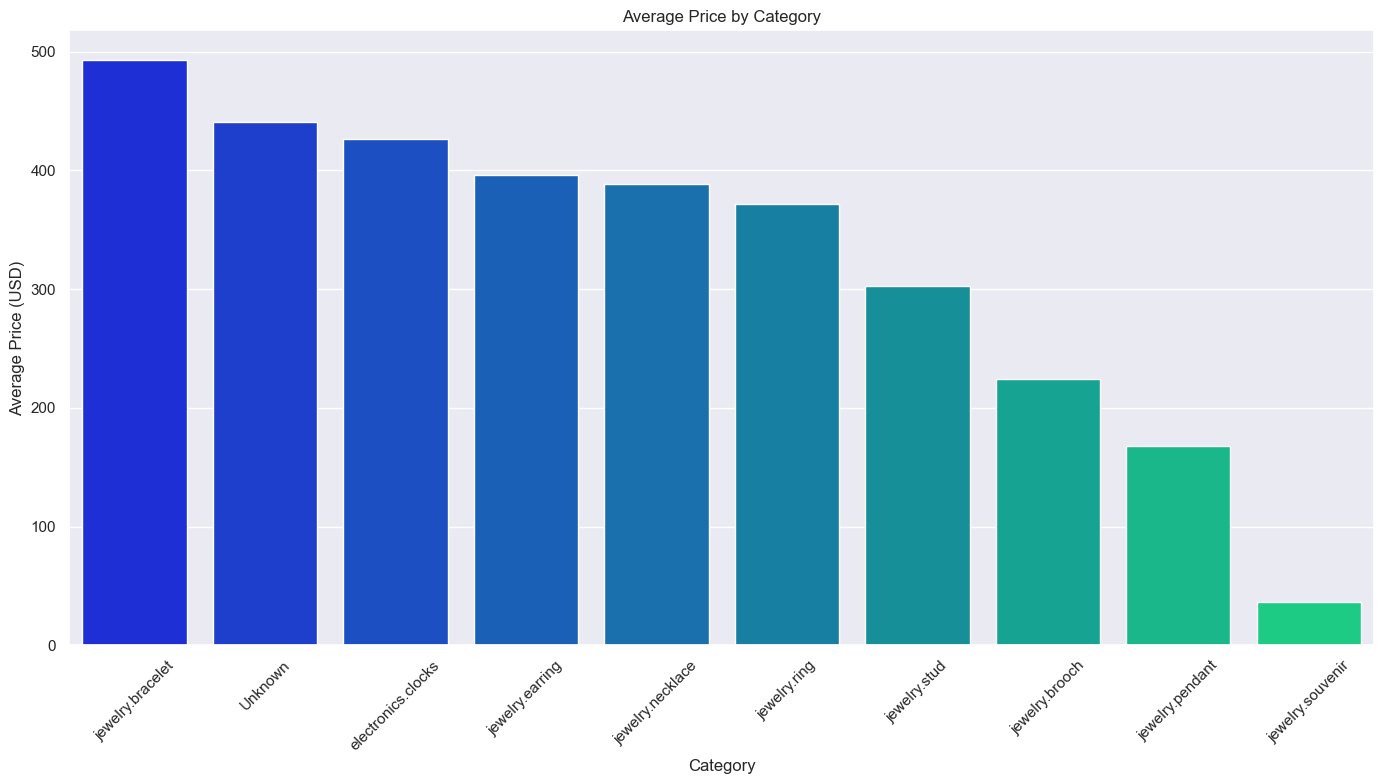

In [32]:
# Price_USD by Category
# Group by Main_Gem and calculate average price
avg_price_per_gem = df.groupby('Category')['Price_USD'].mean().reset_index()

# Sort by price 
avg_price_per_gem = avg_price_per_gem.sort_values(by='Price_USD', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_per_gem, x='Category', y='Price_USD', palette='winter')

plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bracelets have the highest average price, followed closely by unknown, clocks, earrings and necklaces respectively, suggesting they may be positioned as more premium items. On the other end, souvenirs and pendants are the most affordable and also rarely purchased, likely aimed at budget-conscious buyers or casual gifting. This gives a clear pricing ladder that can inform both marketing and inventory strategies.

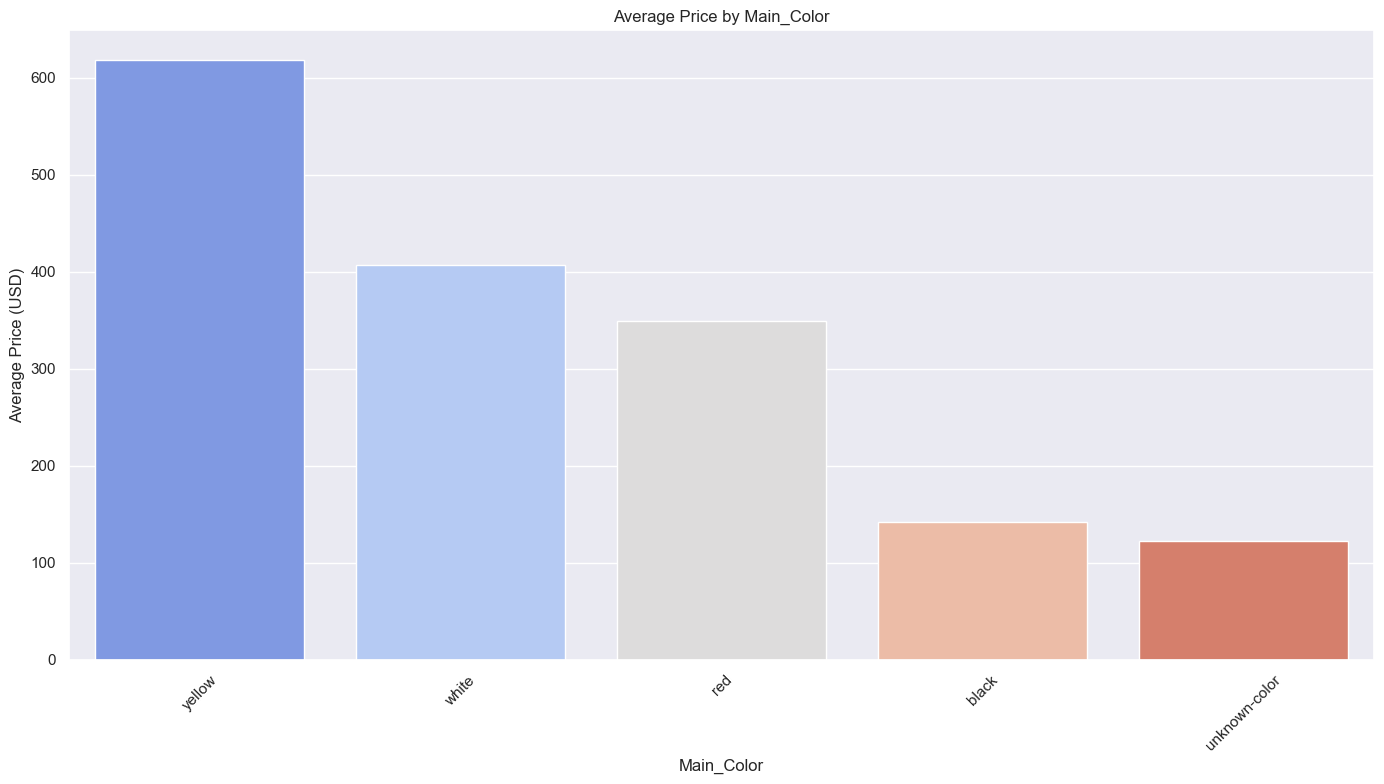

In [33]:
# Price_USD by Main_Color
# Group by Main_Gem and calculate average price
avg_price_per_gem = df.groupby('Main_Color')['Price_USD'].mean().reset_index()

# Sort by price 
avg_price_per_gem = avg_price_per_gem.sort_values(by='Price_USD', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_per_gem, x='Main_Color', y='Price_USD', palette='coolwarm')

plt.title('Average Price by Main_Color')
plt.xlabel('Main_Color')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Prices vary depending on the main color of the jewelry. Yellow pieces tend to be the most expensive, while white and unknown_colors fall in the middle. Red items, though the most common are priced lower. This shows that rarity matters more for price than popularity.

In [34]:
# Calculate the sum of price by main_color
sum_by_color = df.groupby('Main_Color')['Price_USD'].sum()

print(sum_by_color)

Main_Color
black                 284.94
red              23712040.13
unknown-color      257096.54
white             6004567.68
yellow            2053743.77
Name: Price_USD, dtype: float64


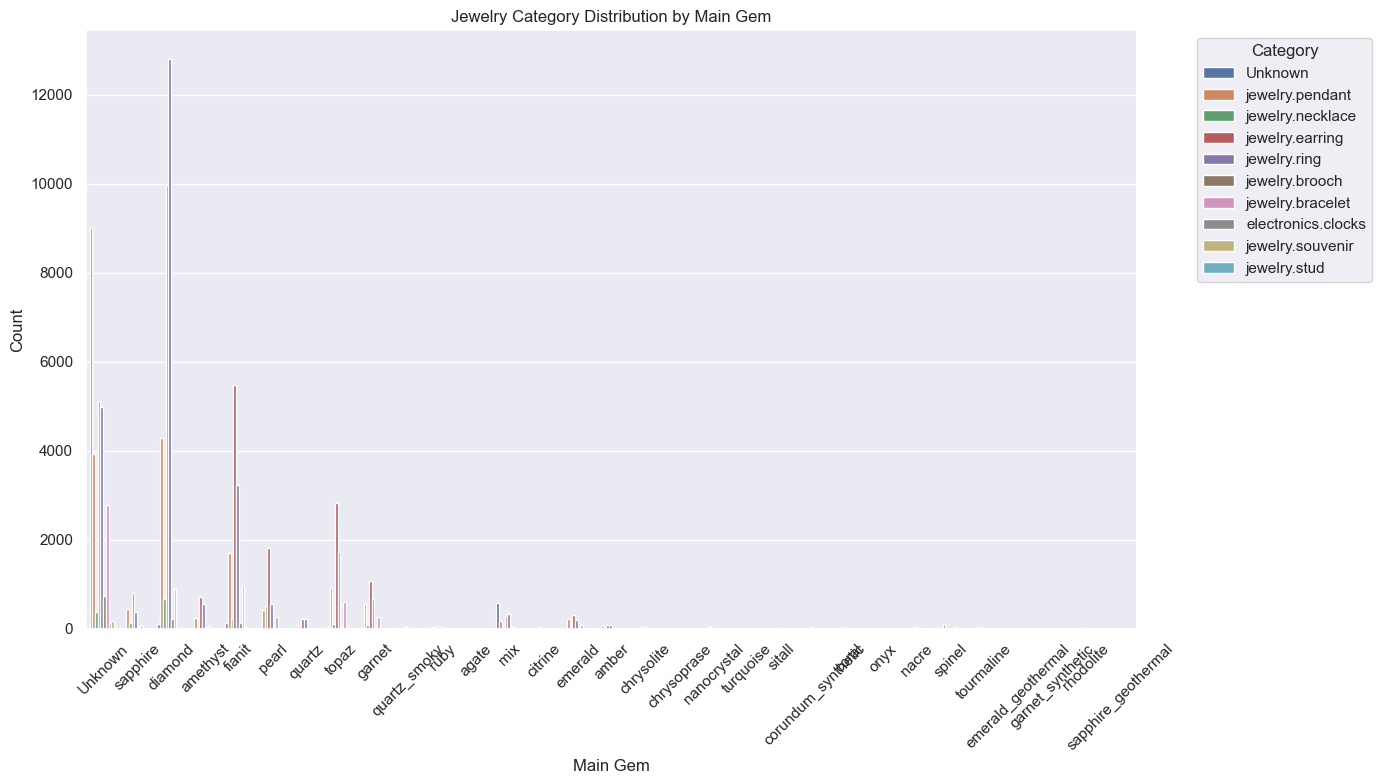

In [35]:
# Category by Main Gem
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Main_Gem', hue='Category')

plt.title('Jewelry Category Distribution by Main Gem')
plt.xlabel('Main Gem')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Diamonds are the most common main gem used in jewelry, with earrings and rings being particularly dominant in this category. Fanit and topaz follow, appearing across various jewelry types with earrings dominating. These trends highlight the strong preference for diamonds in high-value jewelry, while other gems serve niche markets.

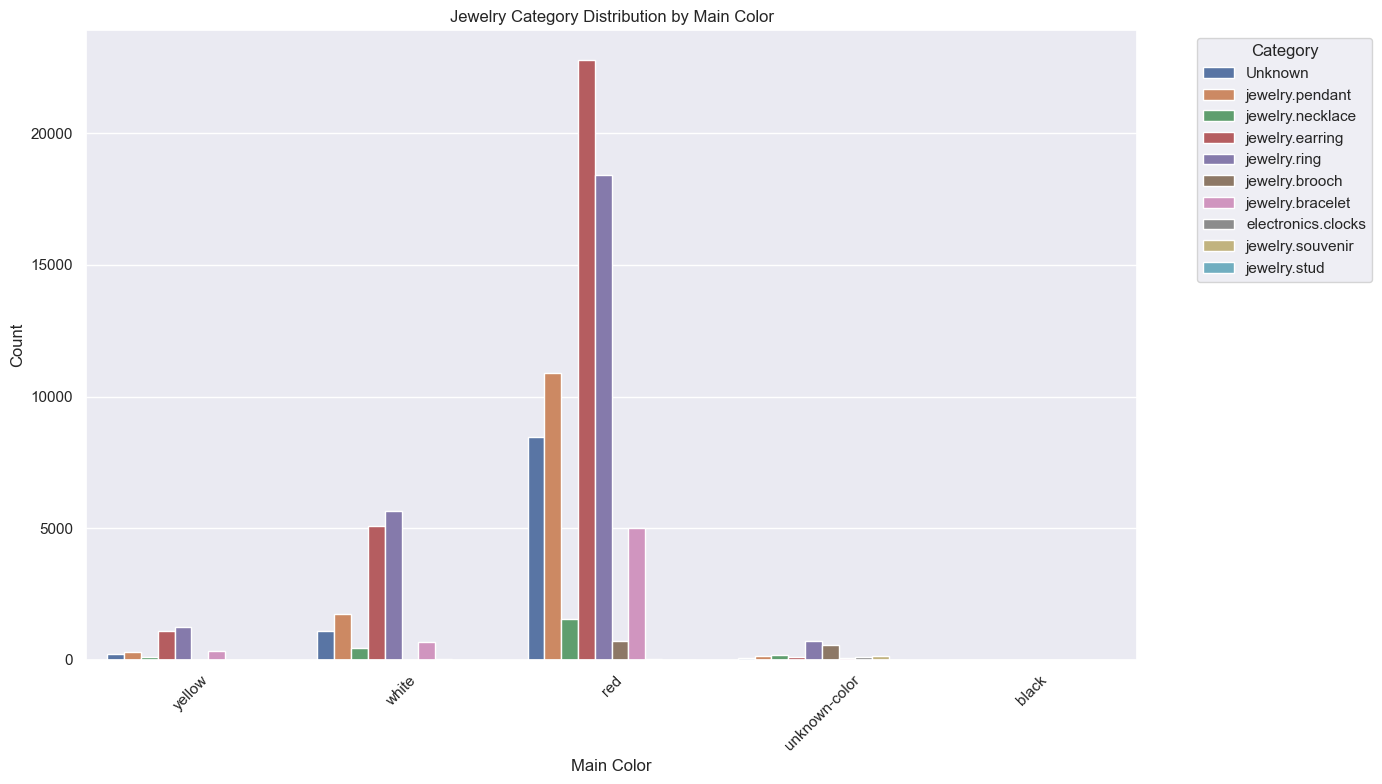

In [36]:
# Category by Main Color
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Main_Color', hue='Category')

plt.title('Jewelry Category Distribution by Main Color')
plt.xlabel('Main Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The red and white jewelry dominate the market, with earrings and rings being the most common in both colors. Yellow jewelry is less frequent and this suggests that earrings and rings are consistently popular across multiple colors, whereas bracelets tend to be more color-specific.

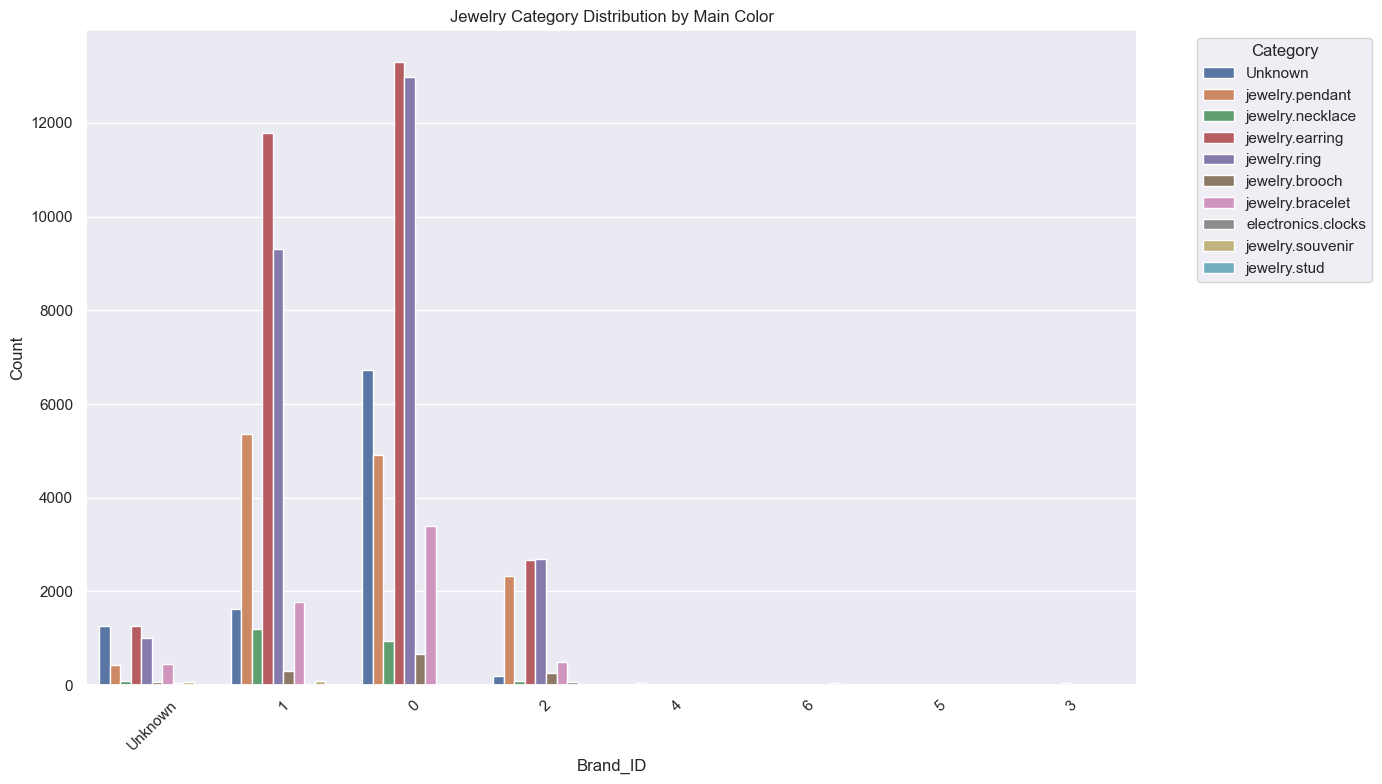

In [37]:
# Category by Brand_ID
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Brand_ID', hue='Category')

plt.title('Jewelry Category Distribution by Main Color')
plt.xlabel('Brand_ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Feature Engineering

In [38]:
# Create columns for enhance model performance
# Price density per category
df['Avg_price_per_category'] = df.groupby('Category')['Price_USD'].transform('mean')

# Price density per metal type
df['Avg_price_per_metal'] = df.groupby('Main_Metal')['Price_USD'].transform('mean')

# Price density per brand
df['Avg_price_per_brand'] = df.groupby('Brand_ID')['Price_USD'].transform('mean')

# Price density per gem type
df['Avg_price_per_gem'] = df.groupby('Main_Gem')['Price_USD'].transform('mean')

# Total revenue 
df['Revenue_est'] = df['Price_USD'] * df['SKU_Quantity']

# Add a price per unit column 
df['Price_per_unit'] = df['Price_USD'] / df['SKU_Quantity']

In [39]:
# Create time-based features
df['Order_month'] = df['Order_Datetime'].dt.month
df['Order_dow'] = df['Order_Datetime'].dt.dayofweek

In [40]:
# Apply log10 transformation to Price column
df['log_price'] = np.log10(df['Price_USD'] + 1)  

In [41]:
df.head(2)

,Order_Datetime,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Gender,...,Order_month,year_month,Avg_price_per_category,Avg_price_per_metal,Avg_price_per_brand,Avg_price_per_gem,Revenue_est,Price_per_unit,Order_dow,log_price
0,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,1.806829e+18,Unknown,Unknown,212.14,1.515916e+18,Unknown,...,12,2018-12-01,440.858554,368.525772,344.392494,280.816851,212.14,212.14,5,2.328665
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1,54.66,1.515916e+18,f,...,12,2018-12-01,168.159447,368.525772,392.060707,318.029315,54.66,54.66,6,1.745543


In [42]:
# Remove irrelevant columns for modeling stage
remove_columns =[
    'Order_Datetime', 
    'Order ID', 
    'Product_ID',
    'Category_ID',
    'User_ID', 
    'year_month'
]

In [43]:
# drop the columns and assign to new variable
df1 = df.drop(columns=remove_columns)
df1.head(2)

,SKU_Quantity,Category,Brand_ID,Price_USD,Gender,Main_Color,Main_Metal,Main_Gem,Order_year,Order_month,Avg_price_per_category,Avg_price_per_metal,Avg_price_per_brand,Avg_price_per_gem,Revenue_est,Price_per_unit,Order_dow,log_price
0,1,Unknown,Unknown,212.14,Unknown,yellow,gold,Unknown,2018,12,440.858554,368.525772,344.392494,280.816851,212.14,212.14,5,2.328665
1,1,jewelry.pendant,1,54.66,f,white,gold,sapphire,2018,12,168.159447,368.525772,392.060707,318.029315,54.66,54.66,6,1.745543


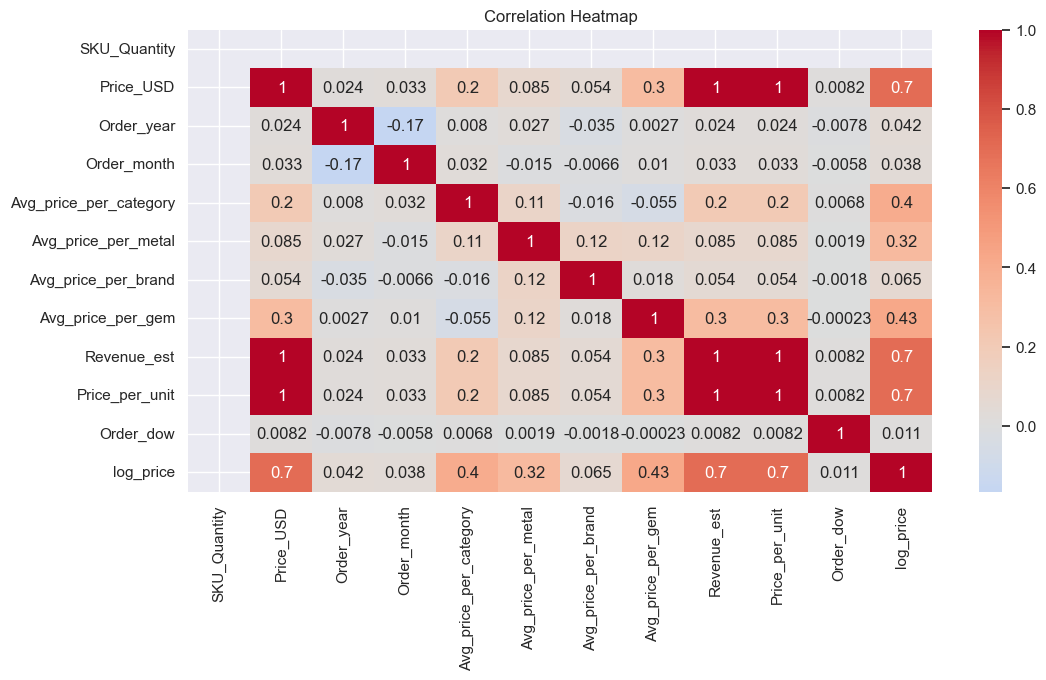

In [44]:
# Calculate the correlation matrix
corr = df1.corr( numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [45]:
# import libraries for modeling stage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
import mlflow
import mlflow.sklearn

In [46]:
# One-hot encoding
df_encoded = pd.get_dummies(
    df1[['Category', 'Main_Color', 'Main_Metal', 'Main_Gem', 'Gender', 'Brand_ID']], drop_first=True)

# Separate data into features and target
X = pd.concat([df1[['SKU_Quantity', 'Order_month', 'Order_dow', 'Order_year', 'Avg_price_per_category','Avg_price_per_brand','Avg_price_per_metal','Avg_price_per_gem', 'Revenue_est']], df_encoded], axis=1)
y = df1['log_price']  

# Split data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70471, 64)
(70471,)
(17618, 64)
(17618,)


##### Modeling

In [47]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Extratrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [48]:
# Store metrics
results = []

# Train and Track Models with MLFlow
mlflow.set_experiment("Price Optimization")   

# train and log models
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        
        # Fit and predict
        model.fit(X_train, y_train)
        log_preds = model.predict(X_test)
        
        # Inverse log transformation
        y_pred = np.expm1(log_preds)
        y_true = np.expm1(y_test)
        
        # Evaluation metrics
        r2 = r2_score(y_test, log_preds) #log space
        mae = mean_absolute_error(y_true, y_pred) #true price
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        
        results.append({
            "Model": model_name,
            "R2 (Log)": r2,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })
        
        # Log model parameters
        mlflow.log_param("model_name", model_name)
        if hasattr(model, 'get_params'):
            mlflow.log_params(model.get_params())
            
        # MLflow metrics logging
        mlflow.log_metric("r2_score", r2)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.set_tag("model_type", model_name)
        
        # Log model
        if model_name.lower() == "xgboost":
            mlflow.xgboost.log_model(model, artifact_path="model")
        else:
            mlflow.sklearn.log_model(model, artifact_path="model")
        
    # Print results
    print(f"\n{model_name}:")
    print(f"R²   = {r2:.4f}")
    print(f"MAE  = {mae:.4f}")
    print(f"MSE  = {mse:.4f}")
    print(f"RMSE = {rmse:.4f}")

2025/05/25 23:31:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Linear Regression:
R²   = 0.7622
MAE  = 1.5979
MSE  = 8.7480
RMSE = 2.9577


2025/05/25 23:32:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Extratrees:
R²   = 1.0000
MAE  = 0.0017
MSE  = 0.0017
RMSE = 0.0414


2025/05/25 23:32:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



XGBoost:
R²   = 1.0000
MAE  = 0.0056
MSE  = 0.0002
RMSE = 0.0138


Linear Regression is the only on with a proper r2 score, the other 2 models have completely overfit the train and test data and so I wont be moving on with them

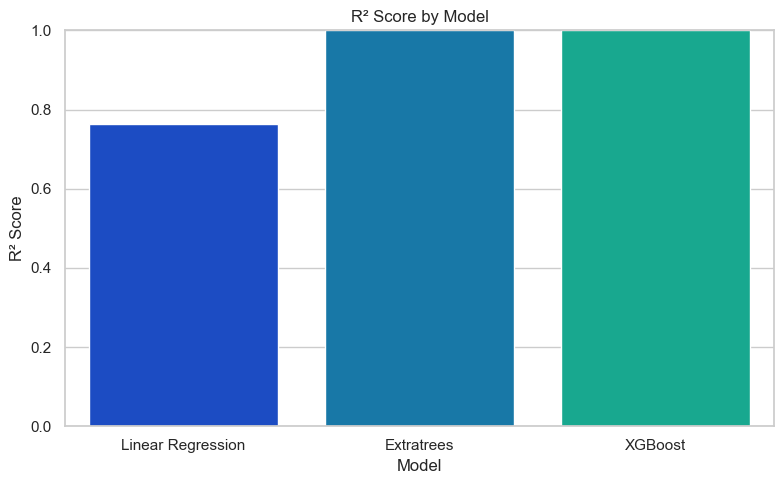

In [49]:
# visualize the evaluation metrics
models_viz = pd.DataFrame(results)[["Model", "R2 (Log)", "MAE", "RMSE"]]
models_viz.columns = ["Model", "R2 Score", "MAE (USD)", "RMSE (USD)"]

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=models_viz, x="Model", y="R2 Score", palette="winter")
plt.title("R² Score by Model")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

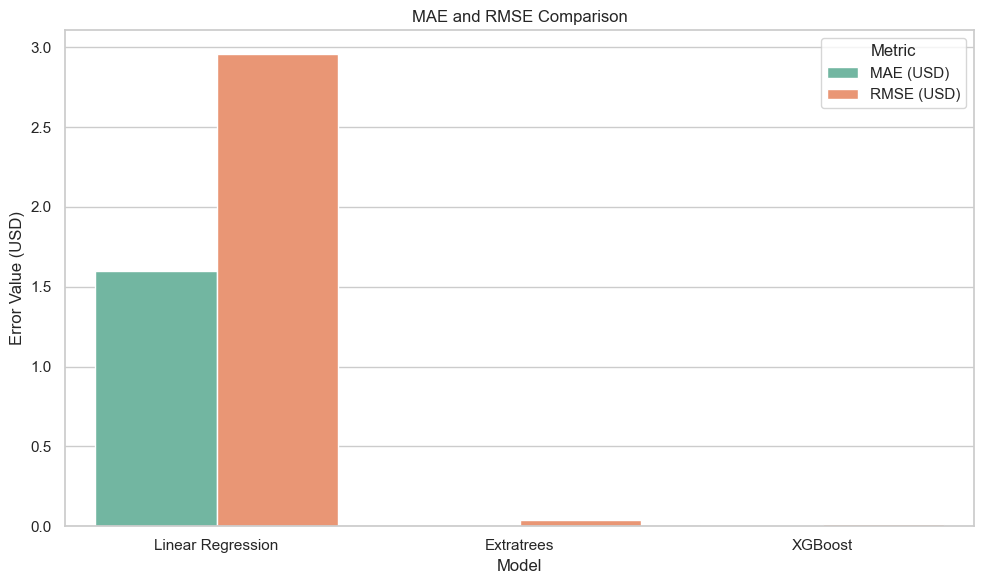

In [50]:
df_metrics = models_viz[["Model", "MAE (USD)", "RMSE (USD)"]].copy()

# Only now do we melt
df_metrics = df_metrics.melt(id_vars="Model", var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics, x="Model", y="Value", hue="Metric", palette="Set2")
plt.title("MAE and RMSE Comparison")
plt.ylabel("Error Value (USD)")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

###### Model understanding